#Step 7
Context generation

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentContextual import EnvironmentContextual
from Code.environment.Customer import Customer
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.ContextManager import ContextManager

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 100
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2.json"
arms = settings.prices

environment = EnvironmentContextual(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

[array([[0.  , 0.04, 0.8 , 0.04],
       [0.  , 0.49, 0.26, 0.  ],
       [0.03, 0.6 , 0.03, 0.  ],
       [0.04, 0.8 , 0.04, 0.  ],
       [0.01, 0.36, 0.36, 0.01]]), array([[0.  , 0.  , 0.02, 0.5 ],
       [0.  , 0.  , 0.  , 0.7 ],
       [0.  , 0.04, 0.8 , 0.03],
       [0.5 , 0.02, 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  ]]), array([[0.02, 0.5 , 0.02, 0.  ],
       [0.16, 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.5 ],
       [0.18, 0.04, 0.  , 0.  ],
       [0.  , 0.17, 0.7 , 0.17]]), array([[0.02, 0.5 , 0.02, 0.  ],
       [0.16, 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.5 ],
       [0.18, 0.04, 0.  , 0.  ],
       [0.  , 0.17, 0.7 , 0.17]])]
loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
lo

loading: [=====================         ] 68.4%
loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   

loading: [====================          ] 64.5%
loading: [====================          ] 65.4%
loading: [====================          ] 66.4%
loading: [=====================         ] 67.4%
loading: [=====================         ] 68.4%
loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    

In [3]:
clairvoyant_arms

{(0, 0): [2, 1, 1, 1, 2],
 (1, 0): [3, 3, 2, 0, 0],
 (0, 1): [1, 1, 3, 0, 2],
 (1, 1): [1, 1, 3, 0, 2]}

In [4]:
clairvoyant_reward

{(0, 0): 2809.41912853376,
 (1, 0): 715.309684406,
 (0, 1): 1900.0716603899996,
 (1, 1): 633.3572201300001}

In [5]:
rew_per_arm[(1, 0)][(3, 3, 3, 3, 3)]

623.222177424

In [6]:
aggregated_clairvoyant_reward = sum(clairvoyant_reward.values())
aggregated_clairvoyant_reward

6058.157693459761

In [7]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

CONTEXT_INTERVAL = 14
TIME_HORIZON = 300
NUM_ITERATION = 1

In [8]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # uniform
prods_dist = np.ones((n_products,n_arms))   # all 1

customers = copy.deepcopy(environment.customers)

for customer in customers:
    customer.set_distribution_alpha(alphas)
    customer.set_num_prods(prods_dist)

UCB

In [9]:
rewards_iterations = []
aggregated_rewards_iterations  = []

for i in range(NUM_ITERATION):
    ucb4_learner = ContextManager(UCBLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % CONTEXT_INTERVAL == 0:
            ucb4_learner.build_context()
            print(str(ucb4_learner.tree))
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    aggregated_rewards_iterations.append(ucb4_learner.aggregate_rewards)
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  113.37366875000004
L rew:  70.48913625000002
R rew:  42.88453249999999
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(1, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 1)]
CUST [Customer(0, 1), Customer(1, 1)]
all rew:  113.37366875000004
L rew:  89.58785875000001
R rew:  23.785810000000005
no split
Iteration # 1
1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), C

{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 2, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 3, 2]}
{(0, 0): [2, 1, 3, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 3, 1, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 2, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 1, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 1, 3, 0, 2]}
loading: [====                          ] 13.3%
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 1, 1, 0, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 0, 2], (1, 1): [1, 0, 3, 1, 2]}
1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0

1: left inx []
no split
LLL:  [Customer(0, 1)]
1: left inx []
no split
RRR:  [Customer(1, 1)]
RRR:  [Customer(0, 1), Customer(1, 1)]
1<-1<None, None>, 0<-1<None, None>, -1<None, None>>>
loading: [=======                       ] 23.3%
{(0, 0): [2, 3, 2, 1, 1], (1, 0): [2, 3, 2, 1, 1], (0, 1): [0, 3, 3, 0, 2], (1, 1): [0, 2, 3, 0, 2]}
{(0, 0): [2, 3, 2, 1, 1], (1, 0): [2, 3, 2, 1, 1], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 0, 3, 2, 2]}
{(0, 0): [2, 3, 2, 3, 1], (1, 0): [2, 3, 2, 3, 1], (0, 1): [1, 0, 3, 2, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 3, 2, 1, 0], (1, 0): [2, 3, 2, 1, 0], (0, 1): [1, 0, 3, 3, 2], (1, 1): [0, 0, 3, 0, 2]}
{(0, 0): [2, 3, 1, 1, 2], (1, 0): [2, 3, 1, 1, 2], (0, 1): [1, 0, 3, 3, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 3, 1, 1, 1], (1, 0): [2, 3, 1, 1, 1], (0, 1): [1, 3, 2, 2, 2], (1, 1): [1, 1, 3, 1, 2]}
{(0, 0): [2, 3, 1, 1, 1], (1, 0): [2, 3, 1, 1, 1], (0, 1): [1, 2, 2, 0, 2], (1, 1): [1, 1, 3, 2, 2]}
{(0, 0): [2, 3, 1, 1, 1], (1, 0): [2, 3, 1, 1, 1], (0, 1): 

all rew:  82.13653360661549
L rew:  59.17958540986317
R rew:  17.27651106814278
split
2: left idx [0, 1]
1: left inx [1]
build left
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 1)]
all rew:  44.60528628503904
L rew:  36.83064282966741
R rew:  9.035164887144619
XXX
split
2: left idx [1]
1: left inx []
no split
LLL:  [Customer(0, 0)]
1: left inx []
no split
RRR:  [Customer(0, 1)]
LLL:  [Customer(0, 0), Customer(0, 1)]
1: left inx [1]
build left
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 0)]
build right
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 1)]
all rew:  37.531247321576444
L rew:  27.74972965983285
R rew:  10.592241378586692
XXX
split
2: left idx [1]
1: left inx []
no split
LLL:  [Customer(1, 0)]
1: left inx []
no split
RRR:  [Customer(1, 1)]
RRR:  [Customer(1, 0), Customer(1, 1)]
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
{(0, 0): [2, 

{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 1, 3, 3, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 0, 3, 3, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 1, 3, 0, 2]}
1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  77.85769580627331
L rew:  44.6236680586462
R rew:  37.24167873455209
XXX
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(1, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 1)]
CUST [Customer(0, 1), Customer(1, 1)]
all rew:  81.8653

{(0, 0): [2, 3, 2, 1, 1], (1, 0): [2, 3, 2, 1, 1], (0, 1): [1, 0, 3, 2, 2], (1, 1): [1, 1, 3, 0, 2]}
{(0, 0): [2, 3, 2, 1, 2], (1, 0): [2, 3, 2, 1, 2], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 1, 3, 1, 2]}
{(0, 0): [2, 3, 2, 1, 2], (1, 0): [2, 3, 2, 1, 2], (0, 1): [1, 2, 3, 2, 2], (1, 1): [1, 2, 3, 1, 2]}
loading: [===================           ] 63.3%
{(0, 0): [2, 3, 1, 1, 2], (1, 0): [2, 3, 1, 1, 2], (0, 1): [1, 3, 3, 0, 2], (1, 1): [1, 0, 3, 3, 2]}
{(0, 0): [2, 3, 1, 1, 2], (1, 0): [2, 3, 1, 1, 2], (0, 1): [1, 0, 3, 2, 2], (1, 1): [1, 0, 0, 0, 2]}
{(0, 0): [2, 3, 1, 1, 2], (1, 0): [2, 3, 1, 1, 2], (0, 1): [1, 0, 3, 3, 2], (1, 1): [1, 1, 3, 2, 2]}
{(0, 0): [2, 3, 1, 1, 2], (1, 0): [2, 3, 1, 1, 2], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 1, 3, 2, 2]}
{(0, 0): [2, 3, 1, 1, 1], (1, 0): [2, 3, 1, 1, 1], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 1, 3, 2, 2]}
{(0, 0): [2, 3, 1, 1, 1], (1, 0): [2, 3, 1, 1, 1], (0, 1): [1, 0, 3, 0, 2], (1, 1): [1, 1, 3, 2, 2]}
1: left inx [0, 1]
build left
AAAAA:  [Cust

all rew:  35.31302401528316
L rew:  26.516513858468592
R rew:  9.280599210463576
XXX
split
2: left idx [1]
1: left inx []
no split
LLL:  [Customer(1, 0)]
1: left inx []
no split
RRR:  [Customer(1, 1)]
RRR:  [Customer(1, 0), Customer(1, 1)]
0<-1<None, None>, 1<-1<None, None>, -1<None, None>>>
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 3], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 0, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 1, 3, 0, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0, 1): [2, 1, 1, 1, 2], (1, 1): [1, 1, 3, 0, 2]}
loading: [=======================       ] 76.7%
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 1], (0

all rew:  76.90196487454439
L rew:  57.42328445100792
R rew:  15.476344548856925
split
2: left idx [0, 1]
1: left inx [1]
build left
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 1)]
all rew:  41.91636061002548
L rew:  33.35794134540624
R rew:  7.9209094935465
no split
LLL:  [Customer(0, 0), Customer(0, 1)]
1: left inx [1]
build left
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 0)]
build right
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 1)]
all rew:  34.98560426451891
L rew:  25.96744204860537
R rew:  9.012516361459594
no split
RRR:  [Customer(1, 0), Customer(1, 1)]
0<-1<None, None>, -1<None, None>>
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 2], (0, 1): [2, 1, 1, 1, 2], (1, 1): [3, 3, 2, 3, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 2], (0, 1): [2, 1, 1, 1, 2], (1, 1): [3, 3, 2, 3, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 2, 3, 2], (0, 1): [2, 1, 1, 1, 2]

(1, 300)

In [10]:
ucb4_learner.build_context()
str(ucb4_learner.tree)

1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  73.60847686325367
L rew:  40.95699843795907
R rew:  34.94127845289282
XXX
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(1, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 1)]
CUST [Customer(0, 1), Customer(1, 1)]
all rew:  75.89827689085189
L rew:  58.70664031848417
R rew:  15.47296005984224
split
2: left idx [0, 1]
1: left inx [1]
build left
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 1)]
all rew:  40.95699843795907
L rew:  33.0870142679

'0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>'

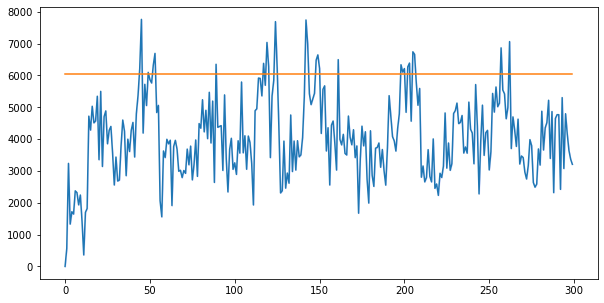

In [11]:
plt.figure(figsize=(10, 5))

mean = np.mean(aggregated_rewards_iterations, axis=0)
stdev = np.std(aggregated_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [aggregated_clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [12]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

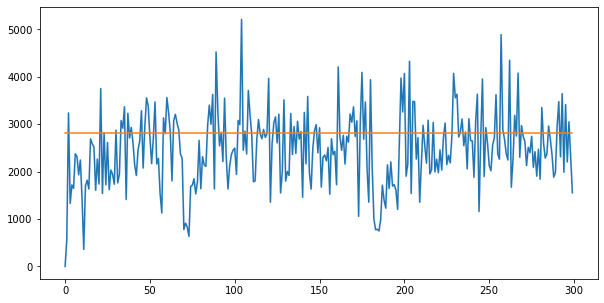

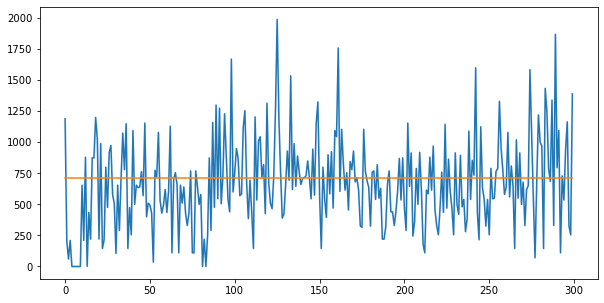

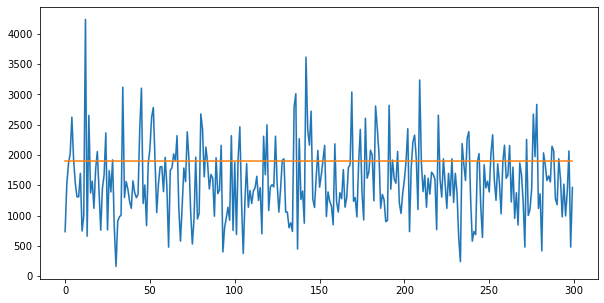

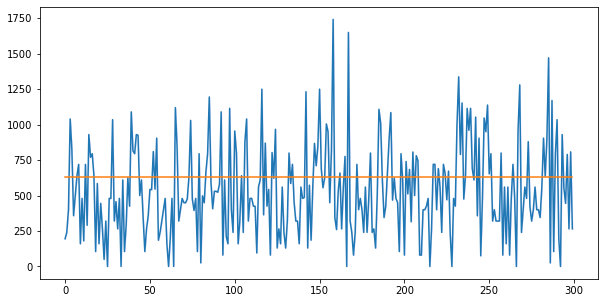

In [13]:
for features in features_list:
    plt.figure(figsize=(10, 5))

    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()


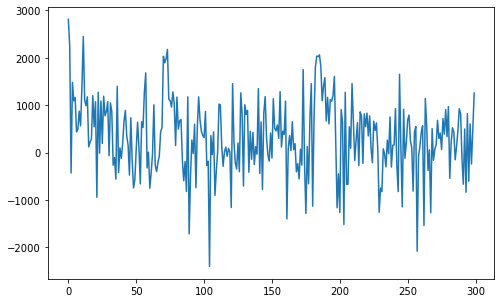

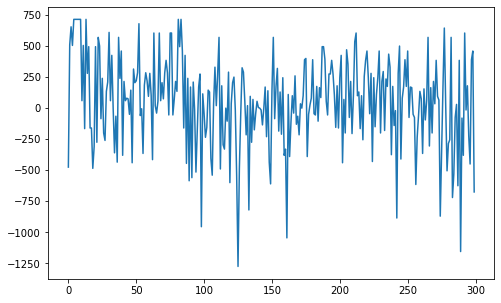

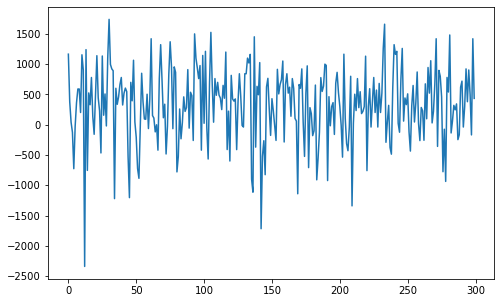

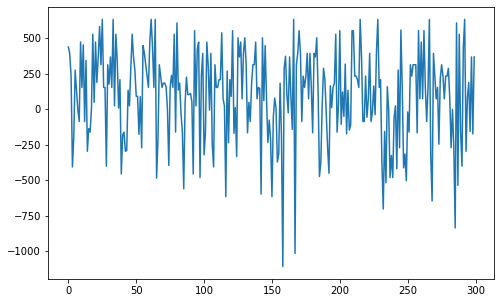

In [14]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.show()

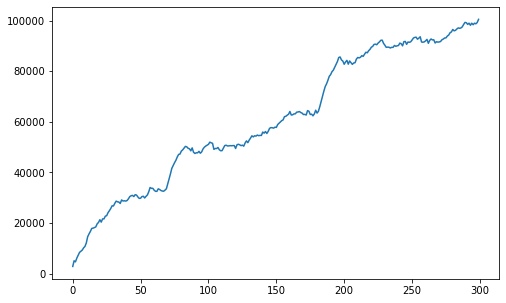

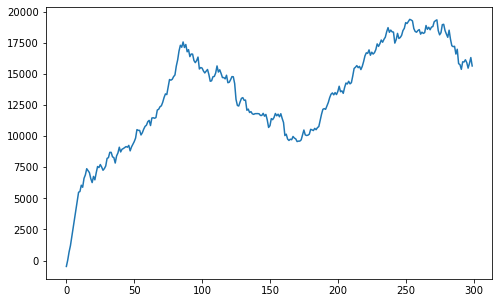

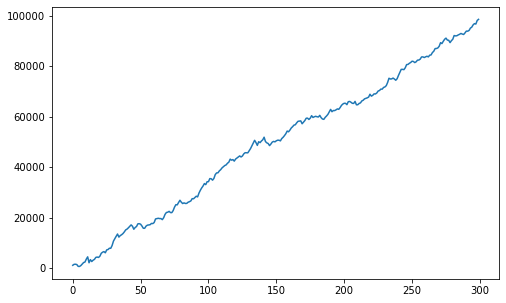

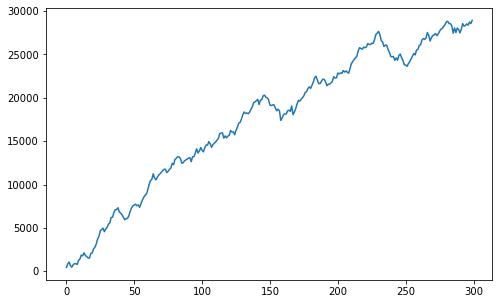

In [15]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.show()

TS

In [9]:
rewards_iterations = []
aggregated_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = ContextManager(TSLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 14 == 0:
            ts_learner4.build_context()
            print(str(ts_learner4.tree))

        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
    aggregated_rewards_iterations.append(ts_learner4.aggregate_rewards)

rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  66.64486261472118
L rew:  46.78825368802835
R rew:  26.60372664354157
XXX
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(1, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 1)]
CUST [Customer(0, 1), Customer(1, 1)]
all rew:  73.39198033156993
L rew:  68.48449807786139
R rew:  14.155084990561736
XXX
split
2: left idx [0, 1]
1: left inx [0]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0)]
CUST [Customer(0, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0)]
CUST [Customer(1, 0)]
all rew:  54.748015491036384
L rew:  41.1032

1: left inx []
no split
LLL:  [Customer(1, 0)]
1: left inx []
no split
RRR:  [Customer(1, 1)]
RRR:  [Customer(1, 0), Customer(1, 1)]
0<-1<None, None>, 1<-1<None, None>, -1<None, None>>>
loading: [======                        ] 20.0%
1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  56.60312389764843
L rew:  34.72834338785539
R rew:  25.092407479207594
XXX
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(1, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 1)]
CUST [Customer(0, 1), Customer(1, 1)]
all rew:  59.82075086706298
L rew:  45.80470557344196
R rew:  12.625563981626872
spl

all rew:  61.28671172939727
L rew:  45.242094436793124
R rew:  12.52136016820147
split
2: left idx [0, 1]
1: left inx [1]
build left
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 1)]
all rew:  35.795016287387256
L rew:  29.06771370082421
R rew:  6.624756564421214
no split
LLL:  [Customer(0, 0), Customer(0, 1)]
1: left inx [1]
build left
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 0)]
build right
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 1)]
all rew:  26.090404889201785
L rew:  21.594511780515145
R rew:  5.871744974081267
XXX
split
2: left idx [1]
1: left inx []
no split
LLL:  [Customer(1, 0)]
1: left inx []
no split
RRR:  [Customer(1, 1)]
RRR:  [Customer(1, 0), Customer(1, 1)]
0<-1<None, None>, 1<-1<None, None>, -1<None, None>>>
loading: [==============                ] 46.7%
loading: [===============               ] 50.0%
1: left inx [0, 1]
build left
AAAAA:  [Custom

1: left inx [1]
build left
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 0)]
build right
AAAAA:  [Customer(1, 0), Customer(1, 1)]
CUST [Customer(1, 1)]
all rew:  26.5959159287522
L rew:  20.23863331951775
R rew:  6.4276771031505895
XXX
split
2: left idx [1]
1: left inx []
no split
LLL:  [Customer(1, 0)]
1: left inx []
no split
RRR:  [Customer(1, 1)]
RRR:  [Customer(1, 0), Customer(1, 1)]
0<-1<None, None>, 1<-1<None, None>, -1<None, None>>>
loading: [=====================         ] 70.0%
loading: [======================        ] 73.3%
1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  62.06380255951893
L rew:  35.59222267743375
R rew:  27.897087856716535
XXX
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Cu

1: left inx [0, 1]
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(0, 1)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(1, 0)]
CUST [Customer(1, 0), Customer(1, 1)]
all rew:  60.905188536596306
L rew:  34.85171202050199
R rew:  27.858930232776558
XXX
build left
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 0)]
CUST [Customer(0, 0), Customer(1, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(1, 0), Customer(0, 1), Customer(1, 1)]
CUST [Customer(0, 1)]
CUST [Customer(0, 1), Customer(1, 1)]
all rew:  62.71064225327855
L rew:  46.09364209504024
R rew:  12.92623198730373
split
2: left idx [0, 1]
1: left inx [1]
build left
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 0)]
build right
AAAAA:  [Customer(0, 0), Customer(0, 1)]
CUST [Customer(0, 1)]
all rew:  35.189185772712904
L rew:  28.4466559

(1, 300)

In [10]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

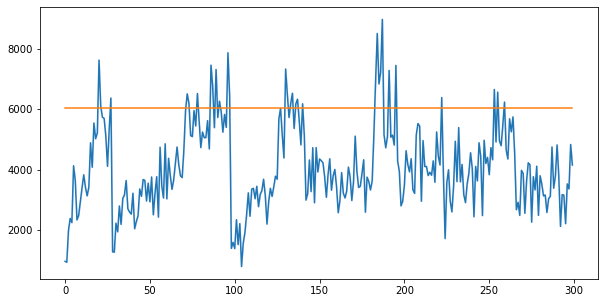

In [11]:
plt.figure(figsize=(10, 5))

mean = np.mean(aggregated_rewards_iterations, axis=0)
stdev = np.std(aggregated_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [aggregated_clairvoyant_reward for _ in range(len(rewards))])
plt.show()


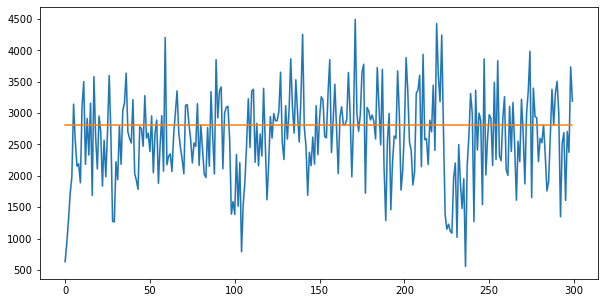

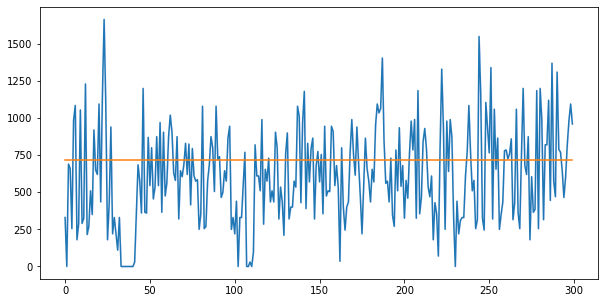

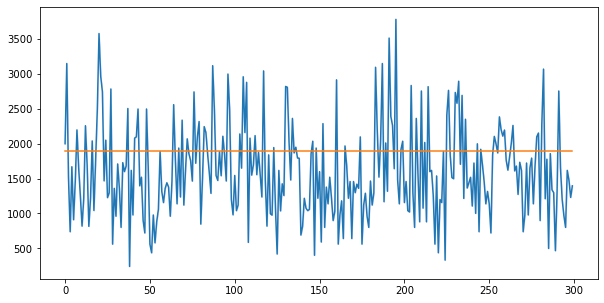

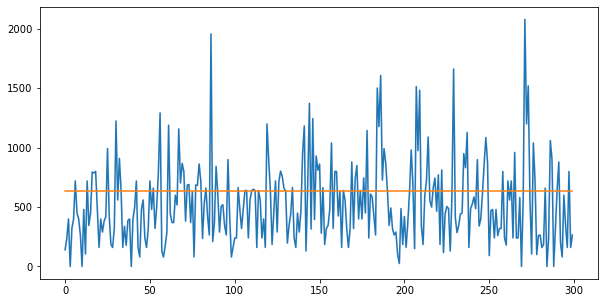

In [12]:
for features in features_list:
    plt.figure(figsize=(10, 5))
    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()

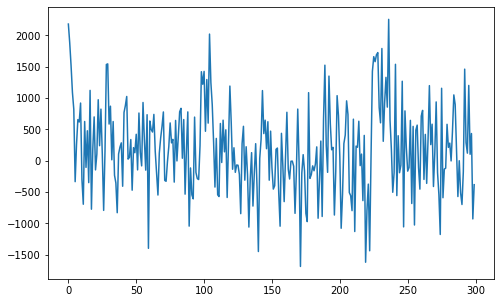

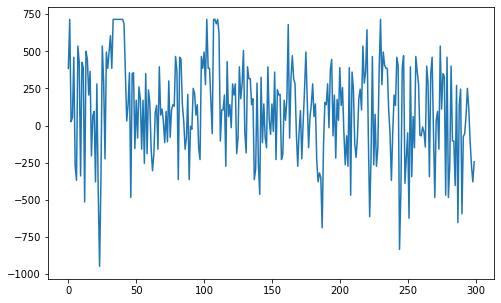

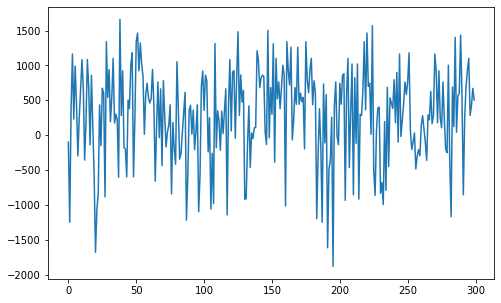

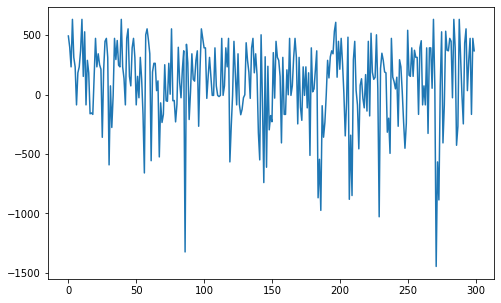

In [13]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.show()

In [14]:
a = np.mean(regret[:,200:], axis=0)
np.shape(a)
print(np.mean(a))

80.36722013000009


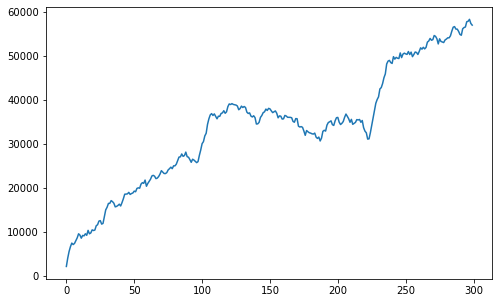

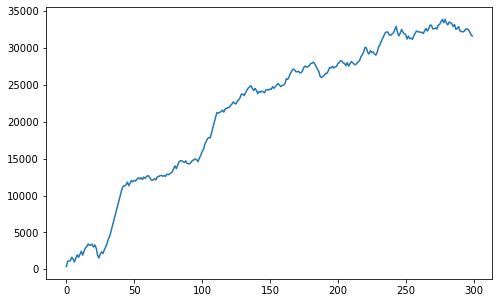

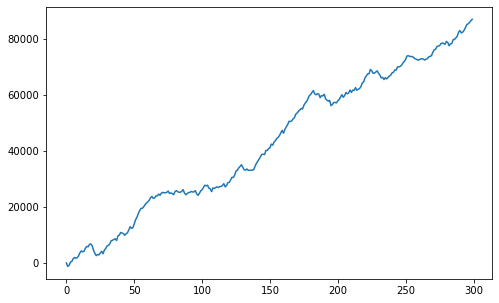

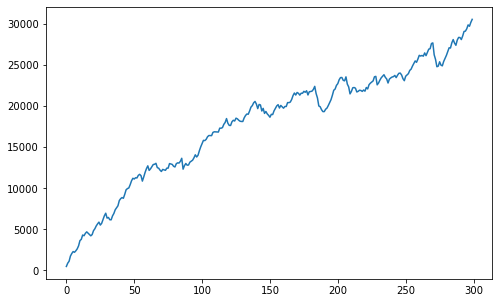

In [15]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.show()